# Exploratory Data Analysis

In [2]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# display plots on the notebook itself
%matplotlib inline

import os
from scipy import stats

In [3]:
path = r"C:\Users\krish\Downloads\proj"
os.chdir(path)
os.getcwd()
os.listdir()

['EDA', 'Model Building', 'ReadMe.txt', 'test.csv', 'train.csv']

# Fetching the data

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.shape

(54808, 14)

## Train data has 54808 rows and 14 columns

In [6]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# CHecking for duplicate values

In [7]:
# removing duplicates at row level
duplicated = train.duplicated()
print(sum(duplicated == True))
print(sum(duplicated == False))

0
54808


## There are no duplicate values in train data

# lets check if there is any variables with only one record or unique records

In [17]:
train.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

## except for the employee_id there no other variables to drop from train data

# Droping unnecessary variables

In [ ]:
train = train.drop(["employee_id"],axis=1)

## Looking at the overview of the data

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [14]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,54808,NaN,NaN,NaN,39195.8,22586.6,1,19669.8,39225.5,58730.5,78298
department,54808,9,Sales & Marketing,16840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,54808,34,region_2,12343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,52399,3,Bachelor's,36669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,54808,2,m,38496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,54808,3,other,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,54808,NaN,NaN,NaN,1.25301,0.609264,1,1,1,1,10
age,54808,NaN,NaN,NaN,34.8039,7.66017,20,29,33,39,60
previous_year_rating,50684,NaN,NaN,NaN,3.32926,1.25999,1,3,3,4,5
length_of_service,54808,NaN,NaN,NaN,5.86551,4.26509,1,3,5,7,37


# Another quick way to get a feel of the data

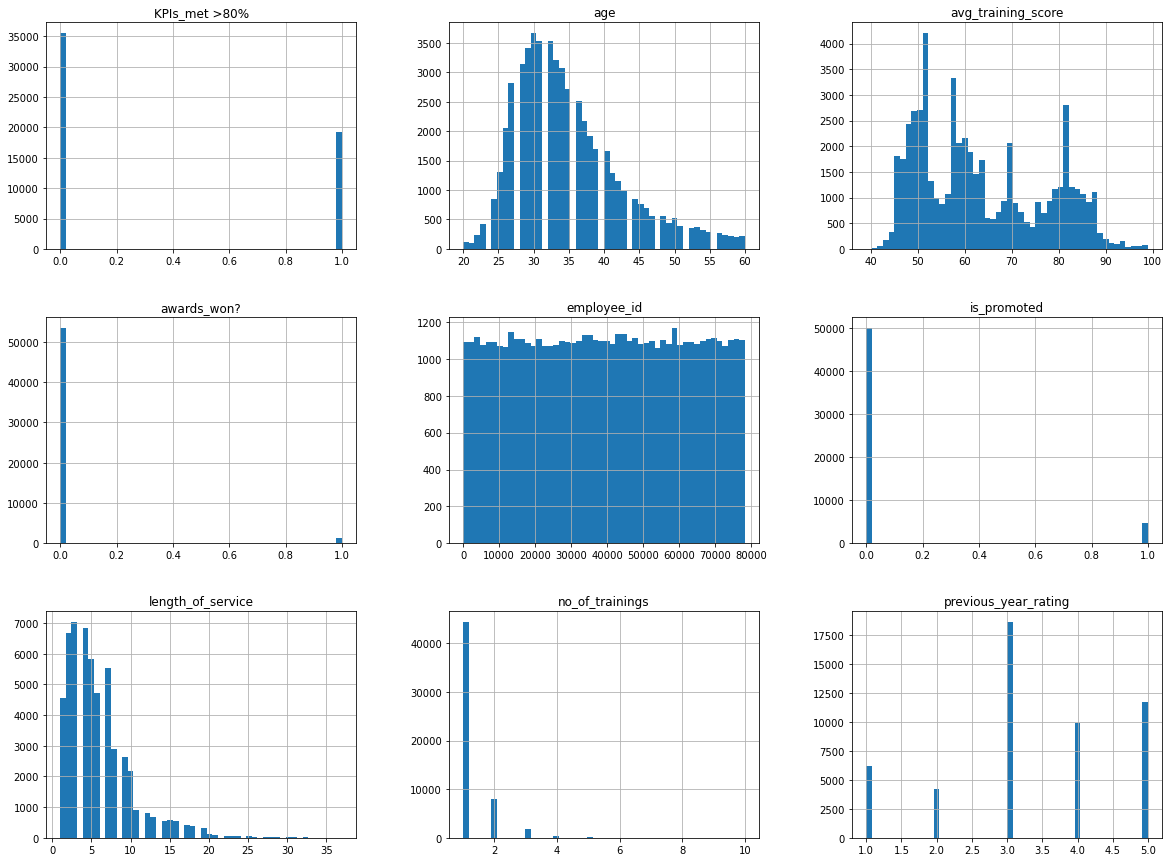

In [16]:
train.hist(bins=50, figsize=(20,15))
plt.show()

# Lets explore the variables

1. employee_id: Unique ID for employee
2. department: Department of employee and there are total of 9 departments
3. region:  Region of employment (unordered) and there are 34 regions
4. education: : Education Level
5. gender:  Gender of Employee
6. recruitment_channel: Channel of recruitment for employee
7. no_of_trainings: no of other trainings completed in previous year on soft skills, technical skills etc., here the minimum is 1 which means every employee is completing atleast one training 
8. age: Age of Employee, ranges from 20 to 60
9. previous_year_rating: Employee Rating for the previous year
10. length_of_service:  Length of service in years
11. KPIs_met >80%:  if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
12. awards_won?: if awards won during previous year then 1 else 0
13. avg_training_score: Average score in current training evaluations
14. is_promoted: (Target) Recommended for promotion and binary

In [20]:
grouped_data = train.groupby(['previous_year_rating', 'KPIs_met >80%'])
grouped_data['is_promoted'].describe().unstack()

count              mean                 std            \
KPIs_met >80%               0       1         0         1         0         1   
previous_year_rating                                                            
1.0                    5424.0   799.0  0.005715  0.071339  0.075390  0.257552   
2.0                    3456.0   769.0  0.018229  0.153446  0.133799  0.360651   
3.0                   13810.0  4808.0  0.032657  0.188020  0.177745  0.390769   
4.0                    5899.0  3978.0  0.024750  0.160382  0.155375  0.367006   
5.0                    4246.0  7495.0  0.144607  0.174383  0.351745  0.379464   

                      min       25%       50%       75%       max       
KPIs_met >80%           0    1    0    1    0    1    0    1    0    1  
previous_year_rating                                                    
1.0                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  
2.0                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  
3.0                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  
4.0                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  
5.0                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0

# missing values identification

In [21]:
def miss_cal(data):
    return(data.isnull().sum()/len(data)*100)

In [23]:
miss_cal(train)

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

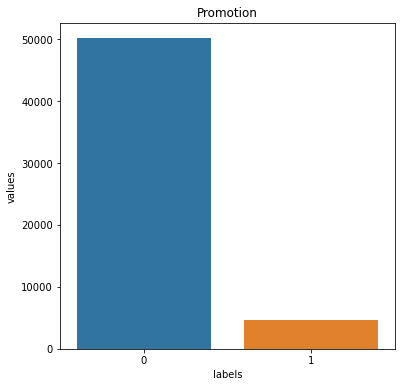

In [24]:
temp = train["is_promoted"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Promotion')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

(array([50140.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4668.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

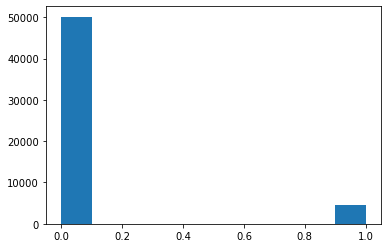

In [25]:
plt.hist(train['is_promoted'])

# add counter plot

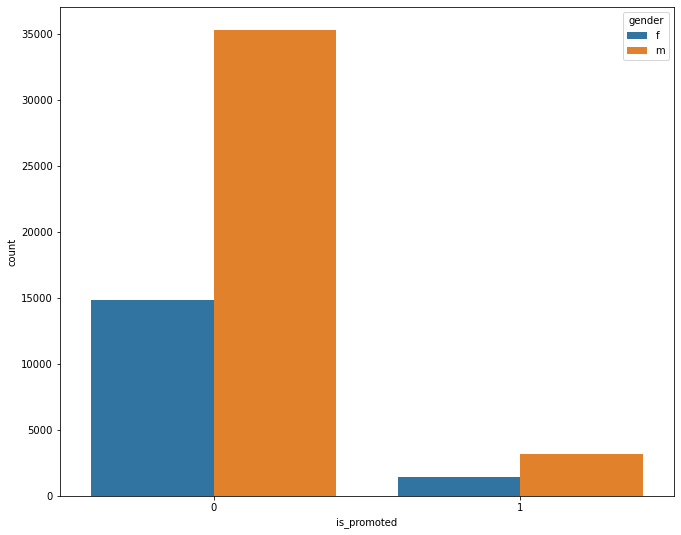

In [26]:
plt.figure(figsize=(11,9))
sns.countplot(x='is_promoted',hue='gender',data = train)

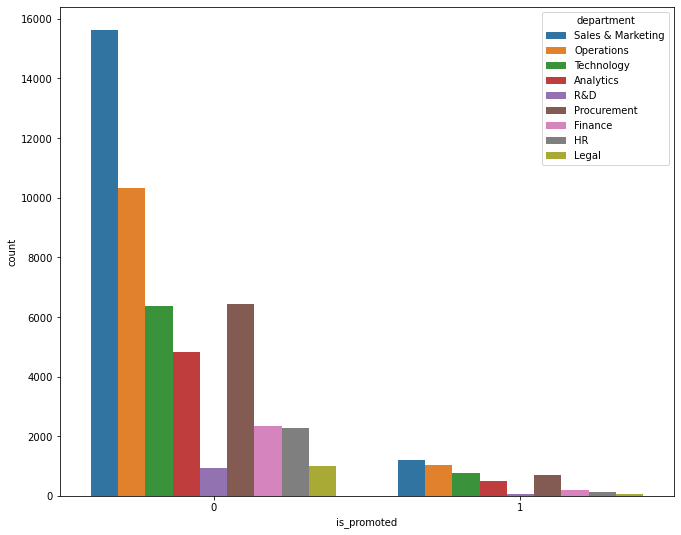

In [27]:
plt.figure(figsize=(11,9))
sns.countplot(x='is_promoted', hue='department', data = train)